3. Remove Gaussian or Speckle Noise (if present)
Why here? After impulse noise is gone, remaining Gaussian or speckle noise (often present in low-light conditions or sensor defects) can be removed using techniques like Gaussian smooth.

Reduce Gaussian Noise (if needed) – If your alternative light source introduced grainy noise, use a Gaussian smooth,wiener_filter,bilateral filtering or a deep-learning-based denoiser.

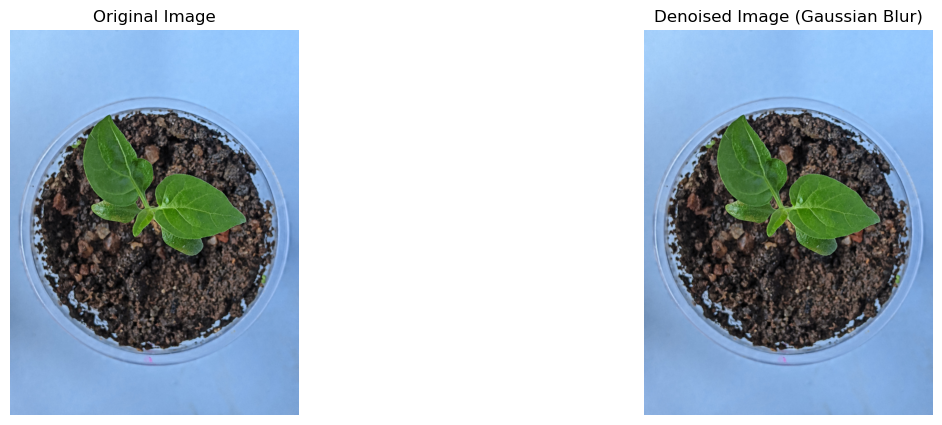

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_noise(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    

    # Split channels
    r, g, b = cv2.split(img)
    
    # Apply Gaussian smoothing to each channel
    r_denoised = cv2.GaussianBlur(r, (5, 5), 1)
    g_denoised = cv2.GaussianBlur(g, (5, 5), 1)
    b_denoised = cv2.GaussianBlur(b, (5, 5), 1)
    
    # Merge channels back
    denoised_img = cv2.merge([r_denoised, g_denoised, b_denoised])
    from cv2 import imwrite
    imwrite('img/5_Remove Gaussian noise_gassian smooth.jpg',cv2.cvtColor(denoised_img, cv2.COLOR_RGB2BGR))
    
    # Display images
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img)
    axs[0].set_title("Original Image")
    axs[0].axis("off")
    
    axs[1].imshow(denoised_img)
    axs[1].set_title("Denoised Image (Gaussian Blur)")
    axs[1].axis("off")
    
    plt.show()

# Example usage
image_path = 'img/4_removing salt-and-pepper noise_median_filtered.jpg'  # Replace with your image path
remove_noise(image_path)


Gaussian Smoothing and Gaussian Noise:
•	How it works: 
o	Gaussian smoothing involves convolving the image with a Gaussian kernel. This effectively averages neighboring pixel values, with weights determined by a Gaussian distribution.   
o	Since Gaussian noise itself follows a Gaussian distribution, the smoothing process can effectively reduce its impact.   
•	Effectiveness: 
o	Gaussian smoothing is reasonably effective at reducing Gaussian noise, particularly when the noise variance is not too high.
o	However, a key trade-off is that it also blurs the image, potentially losing fine details. The stronger the smoothing, the more detail is lost. 


Other Methods for Gaussian Noise Reduction:
While Gaussian smoothing is a common approach, other methods can provide better results in certain situations:

•	Wiener Filter: 
o	The Wiener filter is designed to minimize the mean square error between the estimated image and the true image.   
o	It's particularly effective when the noise characteristics are known or can be estimated.
o	It often provides better results than Gaussian smoothing in terms of preserving image details.

•	Non-Local Means (NLM) Denoising: 
o	NLM denoising takes advantage of the redundancy of information in an image.   
o	It averages pixel values based on the similarity of their surrounding patches, rather than just their immediate neighbors.   
o	This method can be very effective at reducing Gaussian noise while preserving fine details and textures.

•	Bilateral Filter: 
o	This filter also averages pixels, but it takes into account not only the spatial proximity of pixels, but also their intensity similarity. This allows for very good edge preservation, while still smoothing noise.

•	Adaptive Filters: 
o	These filters adjust their parameters based on the local noise characteristics.
o	They can be more effective than fixed filters, especially when the noise variance varies across the image.

In summary:
•	Gaussian smoothing is a simple and widely used method for reducing Gaussian noise, but it can lead to blurring.   
•	More advanced techniques like Wiener filtering, NLM denoising, and bilateral filtering can provide better results in terms of noise reduction and detail preservation.
•	The selection of the correct noise reduction technique, depends heavily on the type and amount of noise present in the image, and also on the requirements of the image processing task.


the differences between bilateral filtering and Wiener filtering
•	Noise Type: 
o	Both can handle Gaussian noise, but their approaches differ.
o	Wiener filtering is more effective when you have a precise statistical model of the noise.
o	Bilateral filtering is very effective at removing gaussian noise, and preserving edges.   
o	For Speckle noise, bilateral filtering can help, but other filters specifically designed for speckle noise are often better.
•	Blur: 
o	Wiener filtering is designed to address blur by attempting to invert the blurring function.
o	Bilateral filtering is primarily for noise reduction and is not designed to directly address blur.
•	Edge Preservation: 
o	Bilateral filtering excels at preserving edges, while Wiener filtering can sometimes blur edges.   
•	Speckle Noise: 
o	Wiener filtering and bilateral filtering can have limited effectiveness on speckle noise. Speckle noise is multiplicative, and these filters are better at dealing with additive noise. Therefore filters designed for multiplicative noise are better suited for speckle noise reduction.
In summary:
•	If you need to remove Gaussian noise and preserve edges, bilateral filtering is often the better choice.   
•	If you need to address both Gaussian noise and blur, and you have a good model of the noise and blur, Wiener filtering can be more effective.

Because of the blurring of the edge, Gaussian smooth is not the best filter. From the above comparison, we can choose the bilateral filter to reduce Gaussian noise.


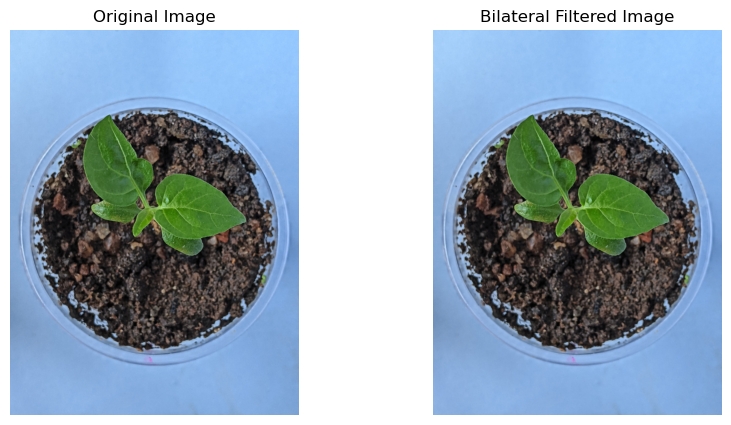

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_bilateral_filter(image_path, d=9, sigma_color=20, sigma_space=20):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
    
    # Split the channels
    r, g, b = cv2.split(img)
    
    # Apply bilateral filtering to each channel separately
    r_filtered = cv2.bilateralFilter(r, d, sigma_color, sigma_space)
    g_filtered = cv2.bilateralFilter(g, d, sigma_color, sigma_space)
    b_filtered = cv2.bilateralFilter(b, d, sigma_color, sigma_space)
    
    # Merge the filtered channels back
    filtered_img = cv2.merge([r_filtered, g_filtered, b_filtered])
    from cv2 import imwrite
    imwrite('img/5_Remove Gaussian noise_bilateral_filter.jpg',cv2.cvtColor(filtered_img, cv2.COLOR_RGB2BGR))
    
    return img, filtered_img

def display_comparison(original, filtered):
    plt.figure(figsize=(10, 5))
    
    # Show original image
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')
    
    # Show filtered image
    plt.subplot(1, 2, 2)
    plt.imshow(filtered)
    plt.title('Bilateral Filtered Image')
    plt.axis('off')
    
    plt.show()

if __name__ == "__main__":
    image_path = 'img/4_removing salt-and-pepper noise_median_filtered.jpg'  # Replace with your image path
    original, filtered = apply_bilateral_filter(image_path)
    display_comparison(original, filtered)


Signal-to-Noise Ratio (SNR): 20.79 dB


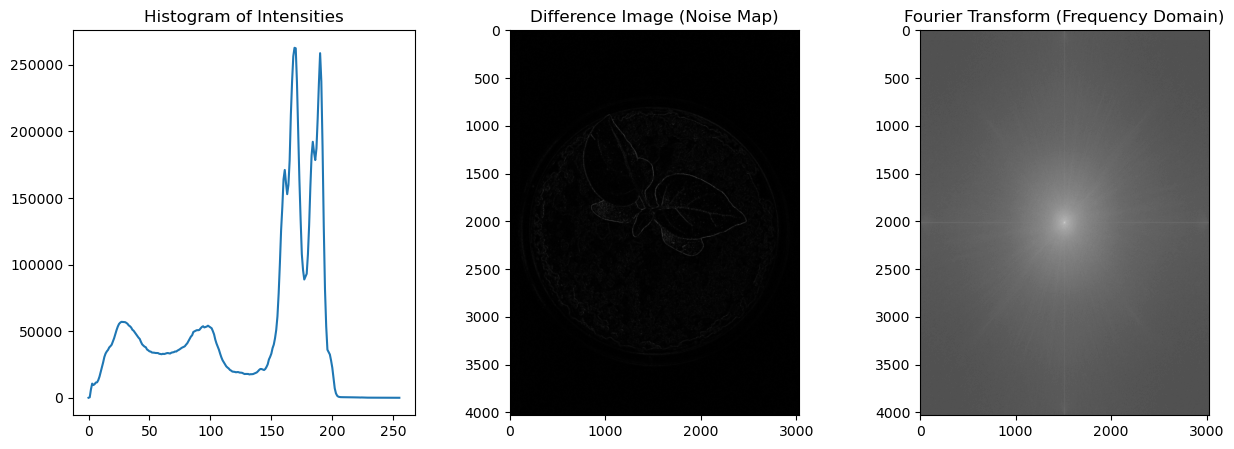

Signal-to-Noise Ratio (SNR): 23.58 dB


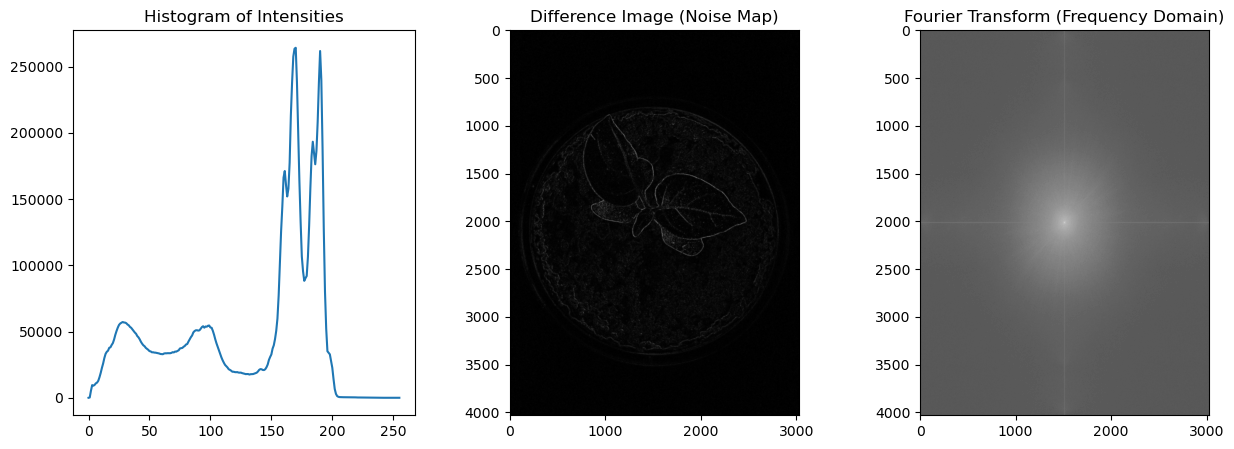

Signal-to-Noise Ratio (SNR): 22.57 dB


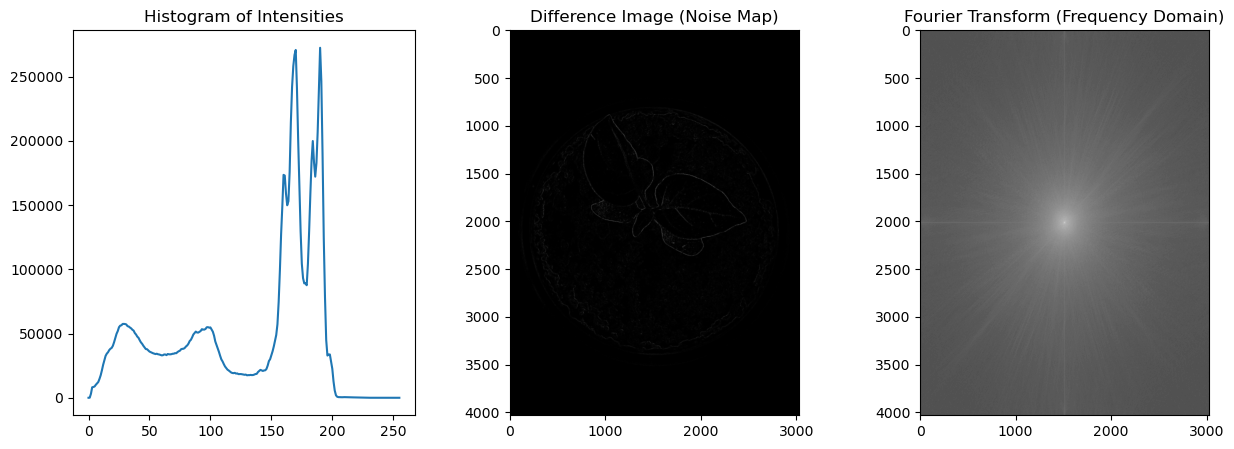

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_gaussian_noise(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Compute histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    
    # Apply Gaussian blur and compute difference
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    diff = cv2.absdiff(img, blurred_img)
    
    # Compute Fourier Transform
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    
    # Compute SNR (Signal-to-Noise Ratio)
    signal_power = np.mean(img ** 2)
    noise_power = np.mean(diff ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    
    print(f"Signal-to-Noise Ratio (SNR): {snr:.2f} dB")
    
    # Show results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(hist)
    ax[0].set_title("Histogram of Intensities")
    
    ax[1].imshow(diff, cmap='gray')
    ax[1].set_title("Difference Image (Noise Map)")
    
    ax[2].imshow(magnitude_spectrum, cmap='gray')
    ax[2].set_title("Fourier Transform (Frequency Domain)")
    
    plt.show()

detect_gaussian_noise("img/4_removing salt-and-pepper noise_median_filtered.jpg")
detect_gaussian_noise("img/5_Remove Gaussian noise_gassian smooth.jpg")
detect_gaussian_noise("img/5_Remove Gaussian noise_bilateral_filter.jpg")

As in the above comparison, we can see the SNR level is between 30 and 20. So, some noise is present, but the signal is still dominant → Acceptable quality.
bilateral_filter has done great noise reduction in there.


What Level is Considered Noise? 
• High SNR (≥ 30 dB): Signal is much stronger than noise → Clean image/data 
• Moderate SNR (20–30 dB): Some noise is present, but signal is still dominant → Acceptable quality 
• Low SNR (10–20 dB): Noise is significant and affects details → Noticeable degradation 
• Very Low SNR (< 10 dB): Noise is overwhelming the signal → Poor quality